In [124]:
import pandas as pd

data = pd.read_csv("../Datasets/taxi_trip_pricing.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [125]:
data.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


In [126]:
data['Day_of_Week'].unique()

array(['Weekday', 'Weekend', nan], dtype=object)

In [127]:
data['Day_of_Week'].value_counts()

Day_of_Week
Weekday    655
Weekend    295
Name: count, dtype: int64

In [128]:
data.isnull().sum()

Trip_Distance_km         50
Time_of_Day              50
Day_of_Week              50
Passenger_Count          50
Traffic_Conditions       50
Weather                  50
Base_Fare                50
Per_Km_Rate              50
Per_Minute_Rate          50
Trip_Duration_Minutes    50
Trip_Price               49
dtype: int64

In [129]:
data['Day_of_Week'] = data['Day_of_Week'].fillna('Weekend')

In [130]:
data.duplicated().sum()

np.int64(0)

In [131]:
cols = data.columns
cols

Index(['Trip_Distance_km', 'Time_of_Day', 'Day_of_Week', 'Passenger_Count',
       'Traffic_Conditions', 'Weather', 'Base_Fare', 'Per_Km_Rate',
       'Per_Minute_Rate', 'Trip_Duration_Minutes', 'Trip_Price'],
      dtype='object')

In [132]:
# Label encoding for each column in ls
ls = ['Time_of_Day', 'Day_of_Week', 'Traffic_Conditions', 'Weather']
label_encoding = data

for col in ls:
    label_encoding[col] = label_encoding[col].astype("category").cat.codes

label_encoding.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,2,0,3.0,1,0,3.56,0.80,0.32,53.82,36.2624
1,47.59,0,0,1.0,0,0,NaN,0.62,0.43,40.57,NaN
2,36.87,1,1,1.0,0,0,2.70,1.21,0.15,37.27,52.9032
3,30.33,1,0,4.0,1,-1,3.48,0.51,0.15,116.81,36.4698
4,NaN,1,0,3.0,0,0,2.93,0.63,0.32,22.64,15.6180


In [133]:
data['Day_of_Week'].value_counts()

Day_of_Week
0    655
1    345
Name: count, dtype: int64

In [134]:
for col in cols:        
    fill_values = label_encoding[col].mean().round(0)
    label_encoding[col] = label_encoding[col].fillna(fill_values)
    
    
label_encoding.isnull().sum()

Trip_Distance_km         0
Time_of_Day              0
Day_of_Week              0
Passenger_Count          0
Traffic_Conditions       0
Weather                  0
Base_Fare                0
Per_Km_Rate              0
Per_Minute_Rate          0
Trip_Duration_Minutes    0
Trip_Price               0
dtype: int64

In [135]:
data['Day_of_Week'].value_counts()

Day_of_Week
0    655
1    345
Name: count, dtype: int64

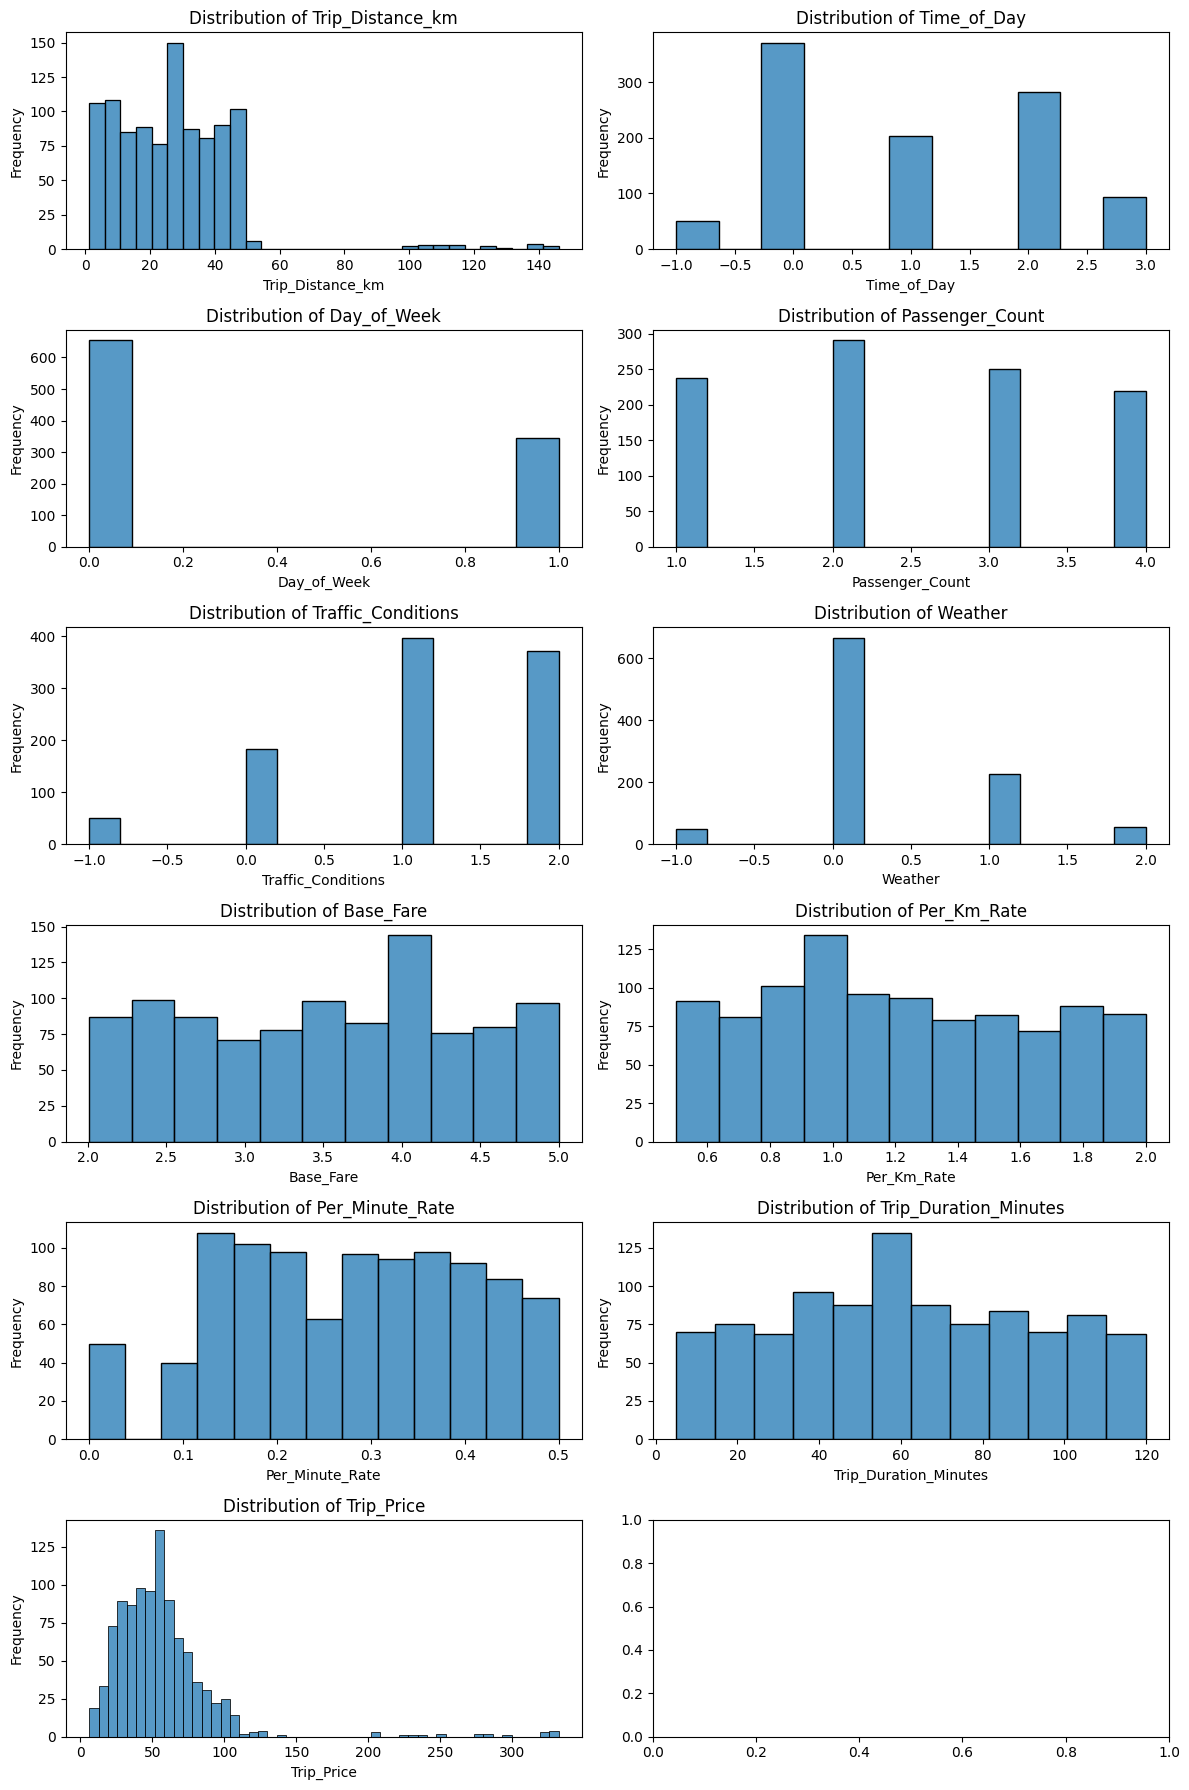

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(6, 2, figsize=(12, 18))  
axes = axes.flatten()  

for i, col in enumerate(cols):
    sns.histplot(label_encoding[col], ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()


In [137]:
from sklearn.model_selection import train_test_split

X = label_encoding.drop("Trip_Price", axis = 1)
y = label_encoding["Trip_Price"]

# Split data
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [138]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

for i in range (2, 16):

    clff = DecisionTreeRegressor(criterion="squared_error", max_depth=i, random_state=42)
    clff.fit(X_train, y_train)

    # Evaluate Model
    y_pred = clff.predict(X_test)

    print(f'R2 Score at depth = {i}:',
        round(r2_score(y_test, y_pred), 2)* 100)
    
print('-' *50)



R2 Score at depth = 2: 47.0
R2 Score at depth = 3: 64.0
R2 Score at depth = 4: 71.0
R2 Score at depth = 5: 77.0
R2 Score at depth = 6: 82.0
R2 Score at depth = 7: 84.0
R2 Score at depth = 8: 85.0
R2 Score at depth = 9: 83.0
R2 Score at depth = 10: 81.0
R2 Score at depth = 11: 83.0
R2 Score at depth = 12: 82.0
R2 Score at depth = 13: 82.0
R2 Score at depth = 14: 82.0
R2 Score at depth = 15: 81.0
--------------------------------------------------


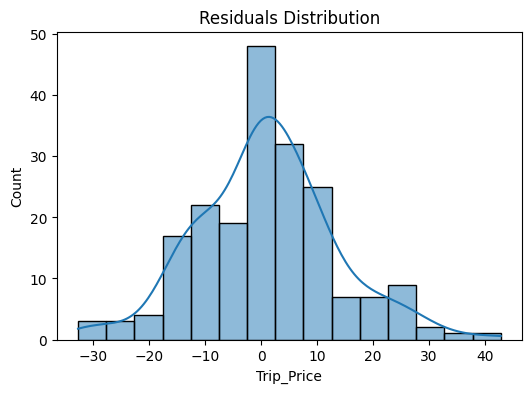

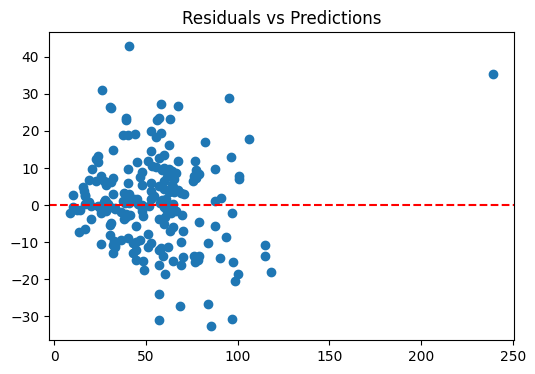

In [139]:
residuals = y_test - y_pred

plt.figure(figsize=(6,4))
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.show()

plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residuals vs Predictions")
plt.show()

In [140]:
for i in range (2, 16):

    clff = RandomForestRegressor(criterion="squared_error", max_depth=i, random_state=42)
    clff.fit(X_train, y_train)

    # Evaluate Model
    y_pred = clff.predict(X_test)

    print(f'R2 Score at depth = {i}:',
        round(r2_score(y_test, y_pred), 2)* 100)
    
print('-' *50)


R2 Score at depth = 2: 52.0
R2 Score at depth = 3: 70.0
R2 Score at depth = 4: 79.0
R2 Score at depth = 5: 86.0
R2 Score at depth = 6: 89.0
R2 Score at depth = 7: 91.0
R2 Score at depth = 8: 91.0
R2 Score at depth = 9: 91.0
R2 Score at depth = 10: 91.0
R2 Score at depth = 11: 91.0
R2 Score at depth = 12: 92.0
R2 Score at depth = 13: 92.0
R2 Score at depth = 14: 92.0
R2 Score at depth = 15: 92.0
--------------------------------------------------


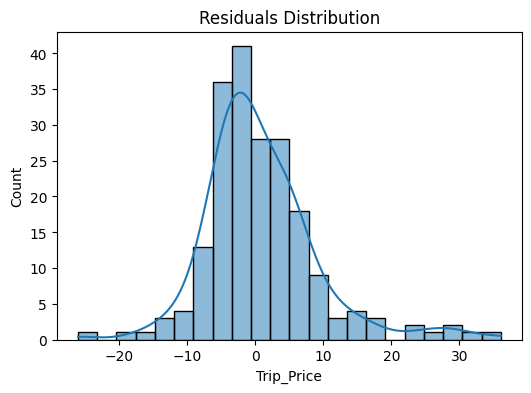

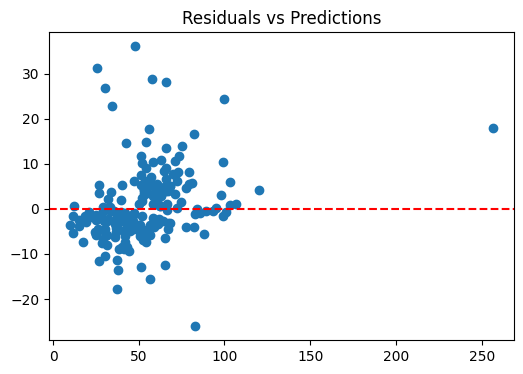

In [141]:
residuals = y_test - y_pred

plt.figure(figsize=(6,4))
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.show()

plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residuals vs Predictions")
plt.show()